In [4]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

--2025-10-07 23:04:44--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv’

car_fuel_efficiency 100%[===================>] 853.70K  3.41MB/s    in 0.2s    

2025-10-07 23:04:45 (3.41 MB/s) - ‘car_fuel_efficiency.csv’ saved [874188/874188]



In [27]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [28]:
df = pd.read_csv('car_fuel_efficiency.csv')
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [29]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [30]:
df.dtypes

engine_displacement      int64
num_cylinders          float64
horsepower             float64
vehicle_weight         float64
acceleration           float64
model_year               int64
origin                  object
fuel_type               object
drivetrain              object
num_doors              float64
fuel_efficiency_mpg    float64
dtype: object

In [31]:
columns = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']
df = df[columns]

In [32]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [33]:
median_hp = df['horsepower'].median()
print(median_hp)

149.0


In [34]:
cols = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']
df = df[cols].copy()

In [35]:
np.random.seed(42)

n = len(df)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

# Separate target variable
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [36]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

def rmse(y, y_pred):
    return np.sqrt(((y - y_pred) ** 2).mean())

In [37]:
base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

def prepare_X(df):
    return df[base].values


In [38]:
df_train_0 = df_train.copy()
df_val_0 = df_val.copy()

df_train_0['horsepower'] = df_train_0['horsepower'].fillna(0)
df_val_0['horsepower'] = df_val_0['horsepower'].fillna(0)

X_train_0 = prepare_X(df_train_0)
X_val_0 = prepare_X(df_val_0)

w0_0, w_0 = train_linear_regression(X_train_0, y_train)
y_pred_0 = w0_0 + X_val_0.dot(w_0)

rmse_0 = rmse(y_val, y_pred_0)
print("RMSE (fill with 0):", round(rmse_0, 2))

RMSE (fill with 0): 0.52


In [39]:
df_train_m = df_train.copy()
df_val_m = df_val.copy()

hp_mean = df_train_m['horsepower'].mean()

df_train_m['horsepower'] = df_train_m['horsepower'].fillna(hp_mean)
df_val_m['horsepower'] = df_val_m['horsepower'].fillna(hp_mean)

X_train_m = prepare_X(df_train_m)
X_val_m = prepare_X(df_val_m)

w0_m, w_m = train_linear_regression(X_train_m, y_train)
y_pred_m = w0_m + X_val_m.dot(w_m)

rmse_m = rmse(y_val, y_pred_m)
print("RMSE (fill with mean):", round(rmse_m, 2))

RMSE (fill with mean): 0.46


In [40]:
if round(rmse_0, 2) < round(rmse_m, 2):
    print("✅ Better option: Fill with 0")
elif round(rmse_0, 2) > round(rmse_m, 2):
    print("✅ Better option: Fill with mean")
else:
    print("✅ Both are equally good")

✅ Better option: Fill with mean


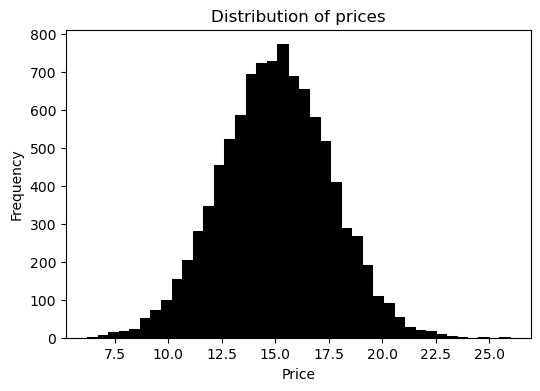

In [41]:
plt.figure(figsize=(6, 4))

sns.histplot(df.fuel_efficiency_mpg, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

In [42]:
df_full = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']].copy()
df_full = df_full.fillna(0)

X = df_full.drop('fuel_efficiency_mpg', axis=1)
y = df_full['fuel_efficiency_mpg']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]
rmse_scores = {}

for r in r_values:
    model = Ridge(alpha=r)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred)
    rmse_scores[r] = round(rmse, 2)

In [44]:
for r, score in rmse_scores.items():
    print(f"r = {r}: RMSE = {score}")

r = 0: RMSE = 0.28
r = 0.01: RMSE = 0.28
r = 0.1: RMSE = 0.28
r = 1: RMSE = 0.28
r = 5: RMSE = 0.28
r = 10: RMSE = 0.28
r = 100: RMSE = 0.28


In [45]:
best_r = min(rmse_scores, key=lambda k: (rmse_scores[k], k))
print(f"\nBest r: {best_r}")


Best r: 0


In [47]:
from sklearn.linear_model import LinearRegression

In [49]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores = []

for seed in seeds:
    # Split into train (60%), validation (20%), test (20%)
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=seed)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=seed)

    # Train Linear Regression (no regularization)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred)
    rmse_scores.append(rmse)

# Compute standard deviation
std_rmse = round(np.std(rmse_scores), 3)

print("RMSE scores per seed:", [round(r, 3) for r in rmse_scores])
print("Standard Deviation of RMSE:", std_rmse)

RMSE scores per seed: [0.268, 0.267, 0.27, 0.272, 0.262, 0.265, 0.265, 0.287, 0.269, 0.27]
Standard Deviation of RMSE: 0.007


In [ ]:
# 2. Split (60% train, 20% val, 20% test) with seed 9
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=9)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=9)

# 3. Combine train + validation
X_train_full = pd.concat([X_train, X_val])
y_train_full = pd.concat([y_train, y_val])

# 4. Train Ridge Regression with r=0.001
model = Ridge(alpha=0.001)
model.fit(X_train_full, y_train_full)

# 5. Predict on test set and compute RMSE
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Test RMSE:", round(rmse, 3))

TypeError: got an unexpected keyword argument 'squared'